In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Read the graph data from the file
with open('./road-euroroad.edges', 'r') as file:
    edges = [line.strip().split() for line in file]

# Create a graph
G = nx.Graph()

# Add edges to the graph
G.add_edges_from(edges)

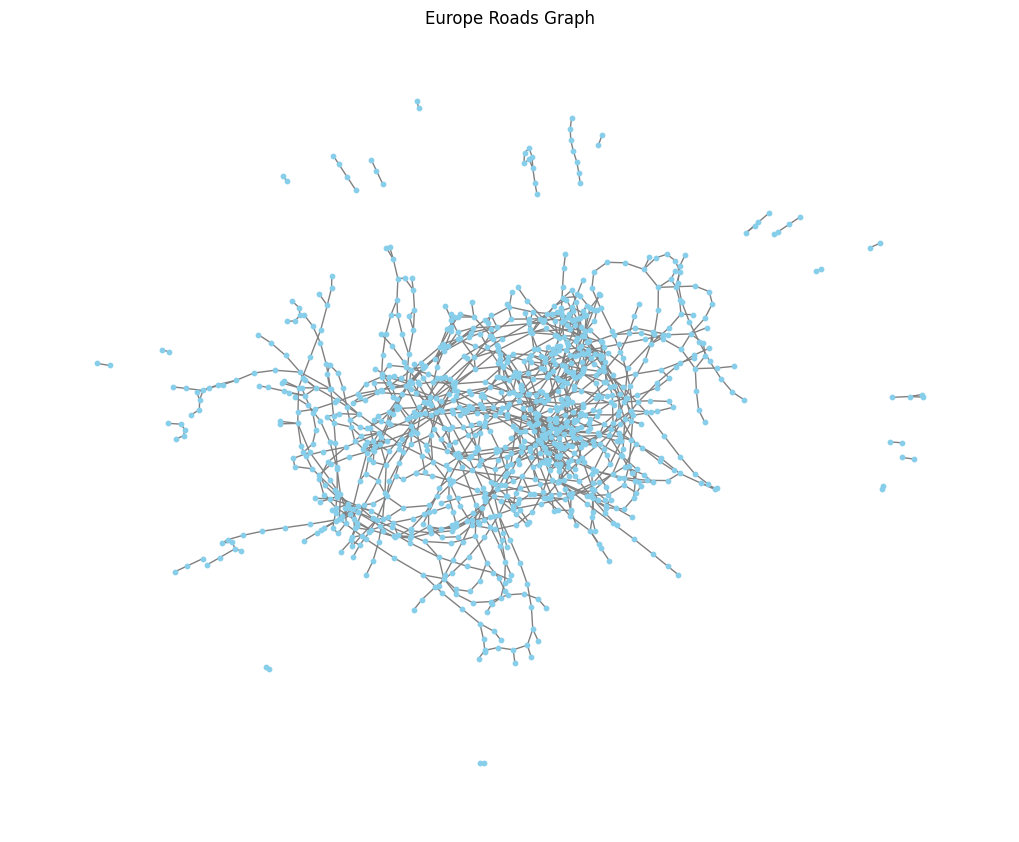

In [ ]:
# Visualize the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)  # Set a seed for reproducibility
nx.draw(G, pos, with_labels=False, node_size=10, node_color='skyblue', edge_color='gray')
plt.title("Europe Roads Graph")
plt.show()

In [ ]:
# Number of nodes and edges
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

# Average degree
average_degree = sum(dict(G.degree()).values()) / num_nodes

# Clustering coefficient
clustering_coefficient = nx.average_clustering(G)

print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
print(f"Average degree: {average_degree:.2f}")
print(f"Clustering coefficient: {clustering_coefficient:.2f}")

Number of nodes: 1174
Number of edges: 1417
Average degree: 2.41
Clustering coefficient: 0.02


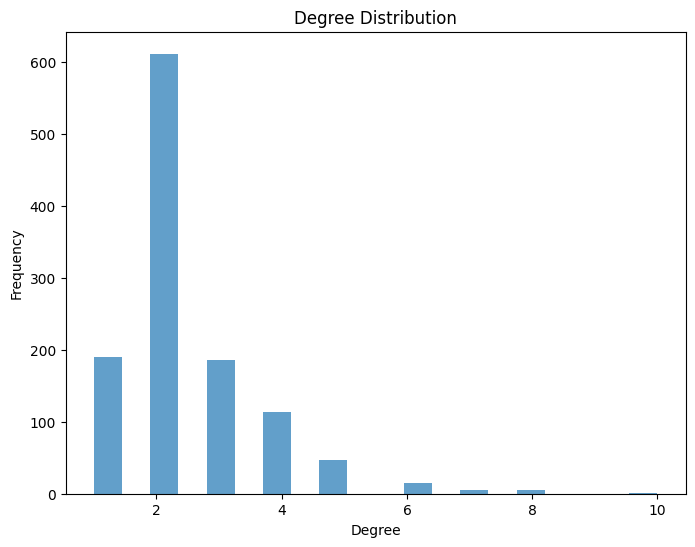

In [ ]:
# Degree distribution
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
plt.figure(figsize=(8, 6))
plt.hist(degree_sequence, bins=20, alpha=0.7)
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution")
plt.show()

#### LLE - Locally Linear Embedding: Application for link prediciton

To visualize the embeddings and use them for link prediction in the network graph 'G,' we'll first apply LLE to obtain the embeddings and then use a simple threshold-based approach for link prediction. In this approach, we'll predict links between node pairs with embeddings that are close enough in the lower-dimensional space. Let's do this step by step:

1. **Apply LLE to Obtain Embeddings:**

We'll start by applying LLE to obtain the embeddings for the nodes in the graph.

In [ ]:
import numpy as np
from sklearn.manifold import LocallyLinearEmbedding

# Convert the graph to an adjacency matrix
A = nx.adjacency_matrix(G).toarray()

# Apply the LLE algorithm to reduce the dimensionality to 2D
lle = LocallyLinearEmbedding(n_components=3, n_neighbors=10)
X = lle.fit_transform(A)

2. **Visualization:**

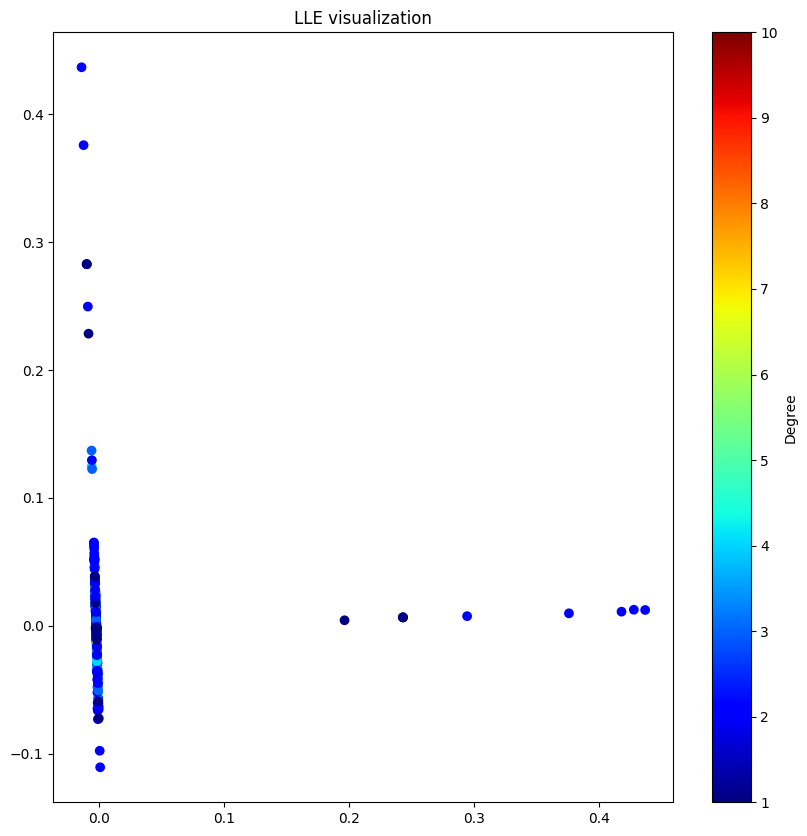

In [ ]:
# Plot the 2D representation of the graph
degrees = [d for n, d in G.degree()]
plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=degrees, cmap="jet")
plt.title("LLE visualization")
plt.colorbar(label="Degree")
plt.show()

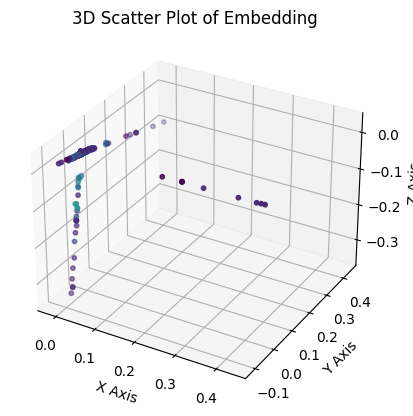

In [ ]:


# Create a figure and a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extract x, y, and z coordinates from the 3D embedding
x = X[:, 0]
y = X[:, 1]
z = X[:, 2]

# Create a scatter plot in 3D
ax.scatter(x, y, z, c=degrees ,marker='o', s=10)  # You can customize color, marker, and size

# Set labels for the axes
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

# Set a title for the plot
plt.title('3D Scatter Plot of Embedding')

# Show the plot
plt.show()


3. **Link Prediction Using Embeddings:**

For link prediction, we'll use a simple threshold-based approach. We'll calculate pairwise distances between node embeddings and predict links for node pairs with distances below a certain threshold.

In [ ]:
# Calculate pairwise distances between embeddings
pairwise_distances = np.linalg.norm(X[:, None] - X, axis=2)

# Set a threshold for link prediction
threshold =  pairwise_distances.mean()

# Create a list of predicted links based on the threshold
predicted_links = []
for i in range(len(G.nodes())):
    for j in range(i + 1, len(G.nodes())):
        if pairwise_distances[i, j] < threshold:
            predicted_links.append((i, j))

# Print the predicted links
print("Predicted Links:")
for node1, node2 in predicted_links:
    print(f"Node {node1} and Node {node2}")

Streaming output truncated to the last 5000 lines.
Node 1073 and Node 1122
Node 1073 and Node 1123
Node 1073 and Node 1124
Node 1073 and Node 1125
Node 1073 and Node 1126
Node 1073 and Node 1127
Node 1073 and Node 1128
Node 1073 and Node 1129
Node 1073 and Node 1130
Node 1073 and Node 1131
Node 1073 and Node 1132
Node 1073 and Node 1133
Node 1073 and Node 1134
Node 1073 and Node 1135
Node 1073 and Node 1136
Node 1073 and Node 1137
Node 1073 and Node 1138
Node 1073 and Node 1139
Node 1073 and Node 1140
Node 1073 and Node 1141
Node 1073 and Node 1142
Node 1073 and Node 1143
Node 1073 and Node 1144
Node 1073 and Node 1145
Node 1073 and Node 1146
Node 1073 and Node 1147
Node 1073 and Node 1148
Node 1073 and Node 1149
Node 1073 and Node 1150
Node 1073 and Node 1151
Node 1073 and Node 1152
Node 1073 and Node 1153
Node 1073 and Node 1154
Node 1073 and Node 1155
Node 1073 and Node 1156
Node 1073 and Node 1157
Node 1073 and Node 1158
Node 1073 and Node 1159
Node 1073 and Node 1160
Node 1073 and

In [ ]:
pairwise_distances

array([[0.        , 0.02716152, 0.00270179, ..., 0.01317332, 0.01314426,
        0.01309282],
       [0.02716152, 0.        , 0.0251117 , ..., 0.01405931, 0.01406933,
        0.01409255],
       [0.00270179, 0.0251117 , 0.        , ..., 0.01134928, 0.01129787,
        0.01120392],
       ...,
       [0.01317332, 0.01405931, 0.01134928, ..., 0.        , 0.00014339,
        0.00041786],
       [0.01314426, 0.01406933, 0.01129787, ..., 0.00014339, 0.        ,
        0.00027447],
       [0.01309282, 0.01409255, 0.01120392, ..., 0.00041786, 0.00027447,
        0.        ]])

In this code:

- We calculate pairwise distances between node embeddings.
- We set a threshold and predict links for node pairs with distances below the threshold.

In [ ]:
#The number of predicted links
print(f"The number of predited links using LLE is: {len(predicted_links)}")

The number of predited links using LLE is: 555729


**PCA: Principal Component Analysis implementation in python**

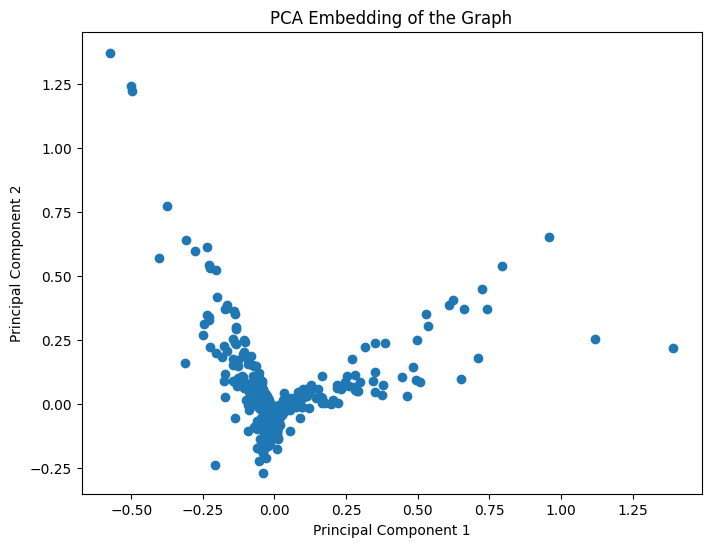

In [ ]:
from sklearn.decomposition import PCA
# Convert the graph to an adjacency matrix
A = nx.adjacency_matrix(G).toarray()
# Perform PCA
pca = PCA(n_components=3)  # You can adjust the number of components as needed
embedding = pca.fit_transform(A)

# Plot the PCA result
plt.figure(figsize=(8, 6))
plt.scatter(embedding[:, 0], embedding[:, 1])
plt.title('PCA Embedding of the Graph')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

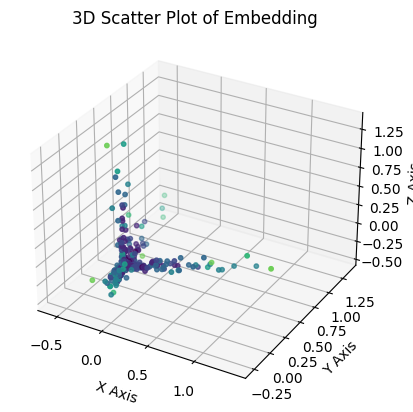

In [ ]:
# Create a figure and a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extract x, y, and z coordinates from the 3D embedding
x = embedding[:, 0]
y = embedding[:, 1]
z = embedding[:, 2]

# Create a scatter plot in 3D
ax.scatter(x, y, z, c=degrees ,marker='o', s=10)  # You can customize color, marker, and size

# Set labels for the axes
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

# Set a title for the plot
plt.title('3D Scatter Plot of Embedding')

# Show the plot
plt.show()
